In [70]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [71]:
conn = sqlite3.connect('RDS-2013-0009.4_SQLITE/Data/FPA_FOD_20170508.sqlite')

In [73]:
# full_df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
# print(full_df.head()) 

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [74]:
# print(full_df.columns)
# full_df['DATE'] = pd.to_datetime(full_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')


In [75]:
# full_df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [151]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE FROM 'Fires'", conn)
print(df.head()) 

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE  
0             33       0.10  
1            133       0.25  
2            152       0.10  
3            180       0.10  
4            180       0.10  


In [152]:
#Julian date format to Gregorian date format
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


In [153]:
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  
0             33       0.10 2005-02-02  
1            133       0.25 2004-05-12  
2            152       0.10 2004-05-31  
3            180       0.10 2004-06-28  
4            180       0.10 2004-06-28  


In [154]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

In [155]:
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
0             33       0.10 2005-02-02      2   Wednesday  
1            133       0.25 2004-05-12      5   Wednesday  
2            152       0.10 2004-05-31      5      Monday  
3            180       0.10 2004-06-28      6      Monday  
4            180       0.10 2004-06-28      6      Monday  


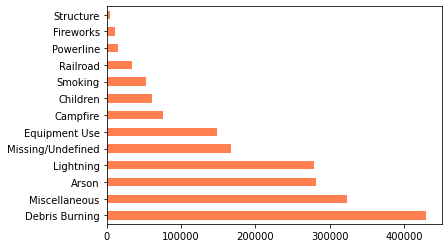

In [156]:
#causes of fire
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

In [157]:
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
df = df.dropna()
print(df.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
0       2005                 7  40.036944 -121.005833      4       2453403.5   
1       2004                 6  38.933056 -120.404444      4       2453137.5   
2       2004                 3  38.984167 -120.735556      4       2453156.5   
3       2004                 6  38.559167 -119.913333      4       2453184.5   
4       2004                 6  38.559167 -119.933056      4       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
0             33       0.10 2005-02-02      2            6  
1            133       0.25 2004-05-12      5            6  
2            152       0.10 2004-05-31      5            1  
3            180       0.10 2004-06-28      6            1  
4            180       0.10 2004-06-28      6            1  


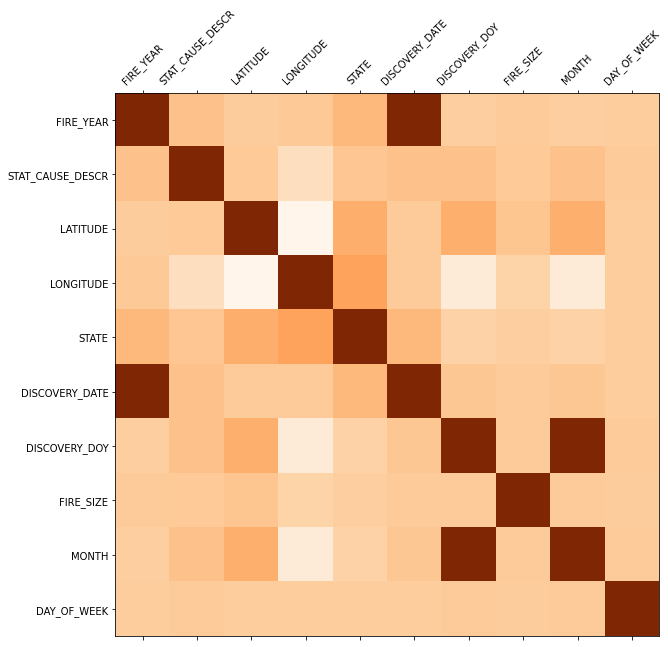

In [158]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df)

In [159]:
df = df.drop('DATE',axis=1)

In [177]:
df_og = df.copy()

In [178]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK
0,2005,7,40.036944,-121.005833,4,2453403.5,33,0.10,2,6
1,2004,6,38.933056,-120.404444,4,2453137.5,133,0.25,5,6
2,2004,3,38.984167,-120.735556,4,2453156.5,152,0.10,5,1
3,2004,6,38.559167,-119.913333,4,2453184.5,180,0.10,6,1
4,2004,6,38.559167,-119.933056,4,2453184.5,180,0.10,6,1


In [179]:
df_og.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK
0,2005,7,40.036944,-121.005833,4,2453403.5,33,0.10,2,6
1,2004,6,38.933056,-120.404444,4,2453137.5,133,0.25,5,6
2,2004,3,38.984167,-120.735556,4,2453156.5,152,0.10,5,1
3,2004,6,38.559167,-119.913333,4,2453184.5,180,0.10,6,1
4,2004,6,38.559167,-119.933056,4,2453184.5,180,0.10,6,1


In [190]:
df_drop_month_fy = df.drop('MONTH',axis=1)
df_drop_month_fy = df_drop_month_fy.drop('FIRE_YEAR',axis=1)

In [191]:
df_drop_month_fy.head()

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,DAY_OF_WEEK
0,7,40.036944,-121.005833,4,2453403.5,33,0.10,6
1,6,38.933056,-120.404444,4,2453137.5,133,0.25,6
2,3,38.984167,-120.735556,4,2453156.5,152,0.10,1
3,6,38.559167,-119.913333,4,2453184.5,180,0.10,1
4,6,38.559167,-119.933056,4,2453184.5,180,0.10,1


In [192]:
X_month_fy = df_drop_month.drop(['STAT_CAUSE_DESCR'], axis=1).values
y_moth_fy = df['STAT_CAUSE_DESCR'].values

In [193]:
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X_month_fy,y_moth_fy,test_size=0.25, random_state=0)
#The Decision tree model
clf_dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
clf_dt = clf_dt.fit(X_train_75, y_train_75)
print(clf_dt.score(X_test_25,y_test_25))

0.5494419474301078


In [194]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train_75, y_train_75)
print(clf_rf.score(X_test_25,y_test_25))

0.5868794363956207


In [185]:
# df_drop_doy_fy = df.drop('DISCOVERY_DOY',axis=1)
# df_drop_doy_fy = df_drop_doy_fy.drop('FIRE_YEAR',axis=1)

In [186]:
# df_drop_doy_fy.head()

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,MONTH,DAY_OF_WEEK
0,7,40.036944,-121.005833,4,2453403.5,0.10,2,6
1,6,38.933056,-120.404444,4,2453137.5,0.25,5,6
2,3,38.984167,-120.735556,4,2453156.5,0.10,5,1
3,6,38.559167,-119.913333,4,2453184.5,0.10,6,1
4,6,38.559167,-119.933056,4,2453184.5,0.10,6,1


In [188]:
# X_doy_fy = df_drop_doy_fy.drop(['STAT_CAUSE_DESCR'], axis=1).values
# y_doy_fy = df['STAT_CAUSE_DESCR'].values

In [189]:
# X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X_doy_fy,y_doy_fy,test_size=0.25, random_state=0)
# #The Decision tree model
# clf_dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
# clf_dt = clf_dt.fit(X_train_75, y_train_75)
# print(clf_dt.score(X_test_25,y_test_25))

0.5494185489995044


In [201]:
df_drop_month_fy_4 = df_og.copy()
df_drop_month_fy_4 = df_drop_month_fy_4.drop('MONTH',axis=1)
df_drop_month_fy_4 = df_drop_month_fy_4.drop('FIRE_YEAR',axis=1)
df_drop_month_fy_4.head();

In [202]:
#Putting all the causes into 4 different categories, since there are so many of them. 
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause

df_drop_month_fy_4['LABEL'] = df_drop_month_fy_4['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
df_drop_month_fy_4 = df_drop_month_fy_4.drop('STAT_CAUSE_DESCR',axis=1)
print(df_drop_month_fy_4.head())
#The new categories are: "natural, accidental, malicious and other"

    LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  DISCOVERY_DOY  FIRE_SIZE  \
0  40.036944 -121.005833      4       2453403.5             33       0.10   
1  38.933056 -120.404444      4       2453137.5            133       0.25   
2  38.984167 -120.735556      4       2453156.5            152       0.10   
3  38.559167 -119.913333      4       2453184.5            180       0.10   
4  38.559167 -119.933056      4       2453184.5            180       0.10   

   DAY_OF_WEEK  LABEL  
0            6      4  
1            6      4  
2            1      4  
3            1      4  
4            1      4  


In [203]:
#This time we want to predict 'Label'. Splitting the dataset into train and test sets once again.
X_label = df_drop_month_fy_4.drop(['LABEL'], axis=1).values
y_label = df_drop_month_fy_4['LABEL'].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_label,y_label,test_size=0.25, random_state=0)

In [204]:
#The Decision tree model
clf_dt_label = tree.DecisionTreeClassifier(random_state=0, max_depth=30)
clf_dt_label = clf_dt_label.fit(X_train_4, y_train_4)
print(clf_dt_label.score(X_test_4,y_test_4))

1.0


In [205]:
clf_rf_4 = ske.RandomForestClassifier(n_estimators=50)
clf_rf_4 = clf_rf_4.fit(X_train_4, y_train_4)
print(clf_rf_4.score(X_test_4,y_test_4))

1.0
